<a href="https://colab.research.google.com/github/athenaap/data_science_hw/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install  StatsForecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.0 MB/s eta 0:00:00


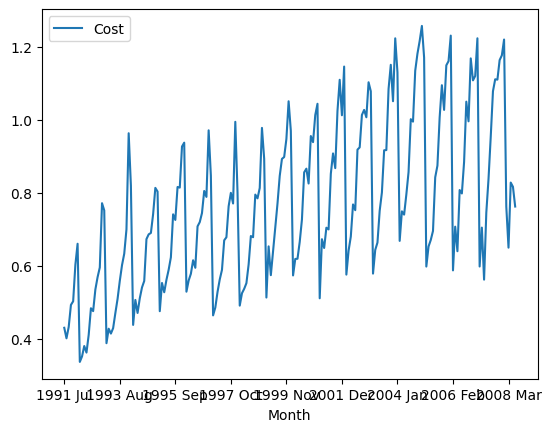

In [2]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [3]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set

1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters,  AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using  MSE (Mean Squared Error).Note that seasonality period is 12.


#1) Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(ap1['Cost'])

# Extract and print results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Conclusion
if p_value <= 0.05:
    print("Reject the null hypothesis. The data is stationary at the 5% significance level.")
else:
    print("Fail to reject the null hypothesis. The data is non-stationary at the 5% significance level.")

ADF Statistic: -1.6967562070359845
p-value: 0.43278454683042955
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476
Fail to reject the null hypothesis. The data is non-stationary at the 5% significance level.


#2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# First remove trend
ap1_diff = ap1.diff().dropna()

# Seasonal difference
ap1_seasonal_diff = ap1_diff.diff(12).dropna()

# Perform ADF test on differenced data
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Reject null hypothesis. Data is stationary at 5% significance.")
    else:
        print("Fail to reject null hypothesis. Data is non-stationary at 5% significance.")
    print("\n")

# Test stationarity
adf_test(ap1_diff['Cost'], "First Difference")
adf_test(ap1_seasonal_diff['Cost'], "Seasonal Difference (after First Difference)")

ADF Test for First Difference:
ADF Statistic: -3.3659382333938805
p-value: 0.012176310540912193
Critical Values:
   1%: -3.465811691080702
   5%: -2.877123351472649
   10%: -2.5750770662586864
Reject null hypothesis. Data is stationary at 5% significance.


ADF Test for Seasonal Difference (after First Difference):
ADF Statistic: -5.07040327971582
p-value: 1.607283495966982e-05
Critical Values:
   1%: -3.467631519151906
   5%: -2.8779183721695567
   10%: -2.575501353364474
Reject null hypothesis. Data is stationary at 5% significance.




#3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

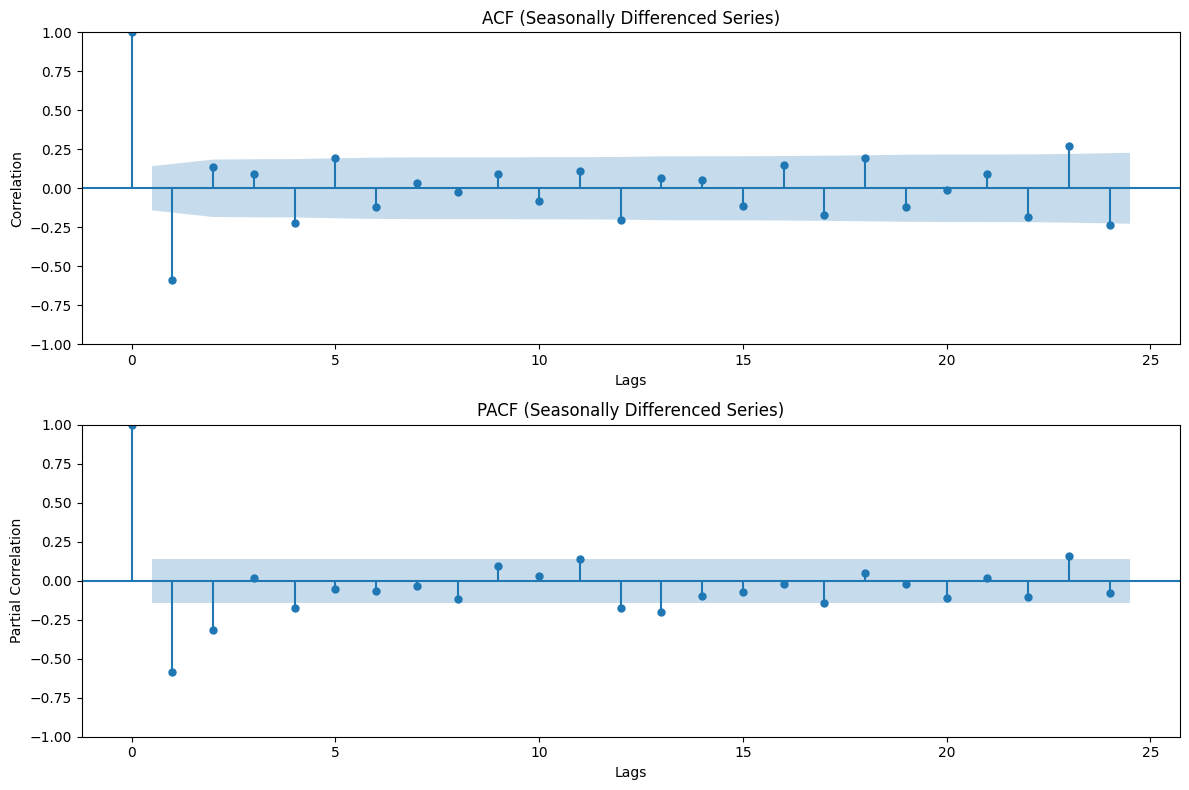

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take differences
ap1_diff = ap1.diff().dropna()
ap1_seasonal_diff = ap1_diff.diff(12).dropna()  # Seasonal difference
# Plot ACF and PACF of differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(ap1_seasonal_diff['Cost'], lags=24, ax=ax1, title='ACF (Seasonally Differenced Series)')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Correlation')

# PACF plot
plot_pacf(ap1_seasonal_diff['Cost'], lags=24, ax=ax2, title='PACF (Seasonally Differenced Series)')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Partial Correlation')

plt.tight_layout()
plt.show()

#4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

In [9]:
import statsmodels.api as sm

# Fit SARIMA(1,1,1)(1,1,1)12
model1 = sm.tsa.SARIMAX(
    ap1['Cost'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
result1 = model1.fit(disp=False)

# Fit SARIMA(0,1,1)(0,1,1)12
model2 = sm.tsa.SARIMAX(
    ap1['Cost'],
    order=(0, 1, 1),
    seasonal_order=(0, 1, 1, 12)
)
result2 = model2.fit(disp=False)

# Compare AIC
print(f"Model 1 (SARIMA(1,1,1)(1,1,1)12) AIC: {result1.aic:.2f}")
print(f"Model 2 (SARIMA(0,1,1)(0,1,1)12) AIC: {result2.aic:.2f}")

# Conclusion
if result1.aic < result2.aic:
    print("Model 1 is better.")
else:
    print("Model 2 is better.")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

Model 1 (SARIMA(1,1,1)(1,1,1)12) AIC: -554.68
Model 2 (SARIMA(0,1,1)(0,1,1)12) AIC: -552.33
Model 1 is better.


#5) Split data into train and test. For the test data, use last 12 months observation.

In [11]:

train = ap1.iloc[:-12]
test = ap1.iloc[-12:]

print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (192, 1), Test shape: (12, 1)


#6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA Performance:
MAE: 0.0808
MAPE: 9.1142%
MSE: 0.0102


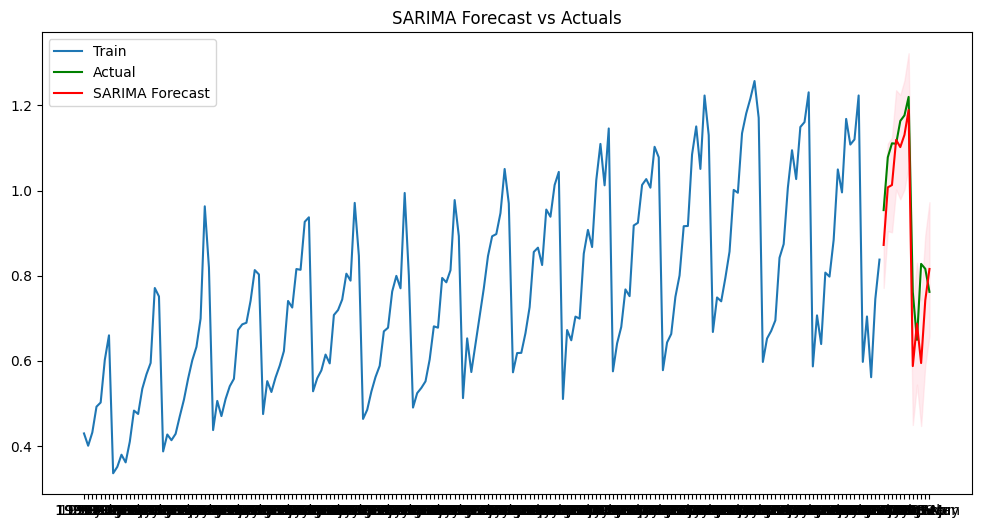

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Fit SARIMA model (using best model from Q4)
sarima_model = SARIMAX(train['Cost'],
                      order=(1,1,1),
                      seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_result.get_forecast(steps=12)
forecast_values = sarima_forecast.predicted_mean
conf_int = sarima_forecast.conf_int()

# Calculate metrics
mae = mean_absolute_error(test['Cost'], forecast_values)
mape = mean_absolute_percentage_error(test['Cost'], forecast_values)
mse = mean_squared_error(test['Cost'], forecast_values)

print(f"SARIMA Performance:")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")

# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Actual', color='green')
plt.plot(test.index, forecast_values, label='SARIMA Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actuals')
plt.legend()
plt.show()

#7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters, AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using MSE (Mean Squared Error).Note that seasonality period is 12.

/usr/local/lib/python3.11/dist-packages/utilsforecast/validation.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(times)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)



Model Comparison (MSE):
AutoETS: 0.0072
MSTL: 0.0077
AutoTheta: 0.0079
AutoARIMA: 0.0083
HoltWinters: 0.0090


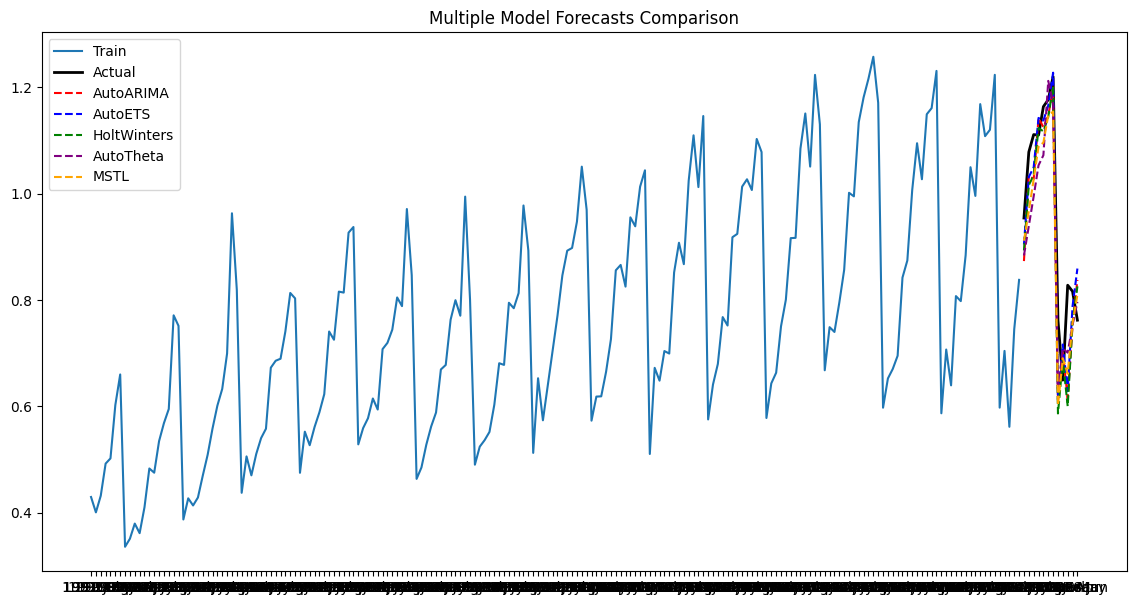

In [13]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, HoltWinters, AutoTheta, MSTL
from statsforecast.utils import AirPassengersDF

# Prepare data in StatsForecast format
sf_train = pd.DataFrame({
    'ds': train.index,
    'y': train['Cost'],
    'unique_id': 1
})

# Define models
models = [
    AutoARIMA(season_length=12),
    AutoETS(season_length=12),
    HoltWinters(season_length=12),
    AutoTheta(season_length=12),
    MSTL(season_length=12)
]

# Fit models
sf = StatsForecast(models=models, freq='M')
sf.fit(sf_train)

forecast_df = sf.predict(h=12, level=[95])

# Evaluate
results = {}
for model in models:
    model_name = type(model).__name__
    pred = forecast_df[model_name].values
    mse = mean_squared_error(test['Cost'], pred)
    results[model_name] = mse

# Print MSE comparison
print("\nModel Comparison (MSE):")
for model, mse in sorted(results.items(), key=lambda x: x[1]):
    print(f"{model}: {mse:.4f}")

# Plot forecasts
plt.figure(figsize=(14,7))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Actual', color='black', linewidth=2)

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, model in enumerate(models):
    model_name = type(model).__name__
    plt.plot(test.index, forecast_df[model_name],
             label=model_name, color=colors[i], linestyle='--')

plt.title('Multiple Model Forecasts Comparison')
plt.legend()
plt.show()